## CSCN8010-Lab6 - Logistic Regression

### NAME : Sudharsan Tirumal
### Student No : 8977532 

I load the IRIS dataset for evaluating accuracy and the confusion matrix. I used the SciKit-Learn (sklearn logistic regression model). In the Iris dataset, there are four types of features, and I used only two labels of data, such as "Virginica and Non-Virginica.". Using those features, we will see the demonstration and evaluated results using the logistic regression model. 

## Import the required libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go

## Load the Iris Dataset

In [3]:
#load the Iris datasets
iris = load_iris()
data = iris.data
target = iris.target

#Make a three class virginica and non virginica class)

bin_data = np.where(target == 2, 1, 0)

# Convert to DataFrame for visualization
iris_df_data = pd.DataFrame(data, columns=iris.feature_names)

# Add species class 
iris_df_data['target_species'] = bin_data
iris_df_data.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


#### Descriptive statistics for Virginica and Non Vigrnica classes

According to the descriptive data, sepals on Virginica flowers are often longer than those on Non-Virginica blooms, but they are also typically narrower. On the other hand, based on average measures, Virginica flowers have petals that are both wider and longer than those of Non-Virginica flowers.

In [4]:
iris_data_des_stat = iris_df_data.groupby('target_species').describe()
iris_data_des_stat = iris_data_des_stat.stack()

iris_data_des_stat = iris_data_des_stat.reset_index()

print(iris_data_des_stat)

    target_species level_1  sepal length (cm)  sepal width (cm)   
0                0   count         100.000000        100.000000  \
1                0    mean           5.471000          3.099000   
2                0     std           0.641698          0.478739   
3                0     min           4.300000          2.000000   
4                0     25%           5.000000          2.800000   
5                0     50%           5.400000          3.050000   
6                0     75%           5.900000          3.400000   
7                0     max           7.000000          4.400000   
8                1   count          50.000000         50.000000   
9                1    mean           6.588000          2.974000   
10               1     std           0.635880          0.322497   
11               1     min           4.900000          2.200000   
12               1     25%           6.225000          2.800000   
13               1     50%           6.500000          3.00000

### Histograms for the two classes

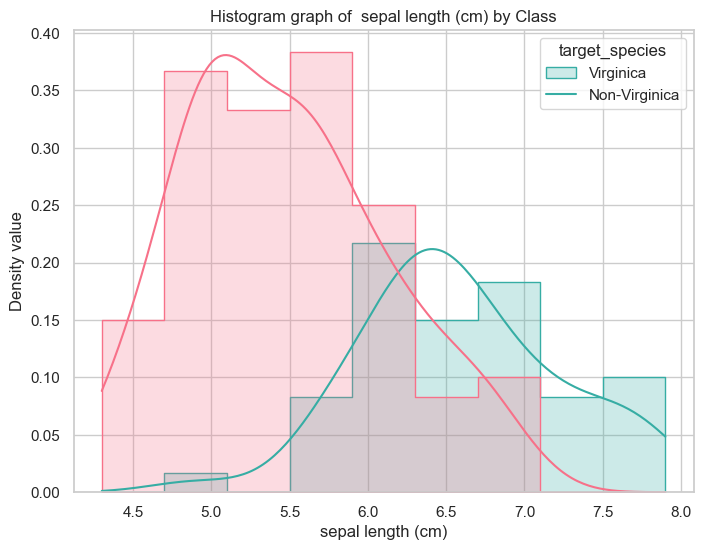

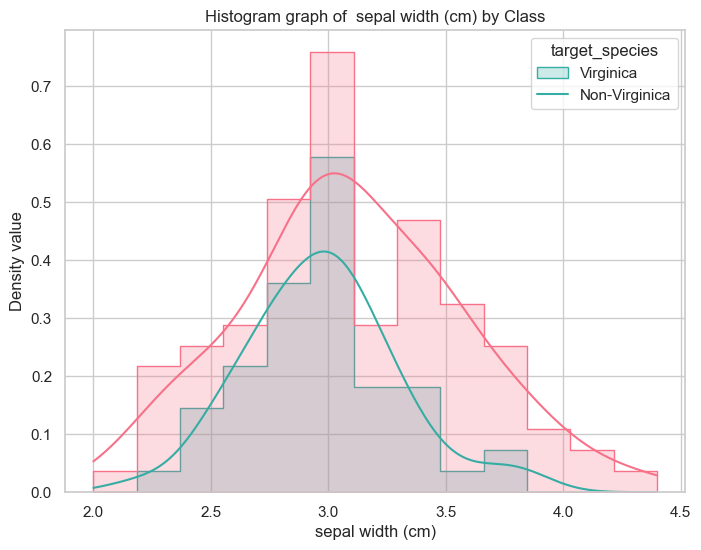

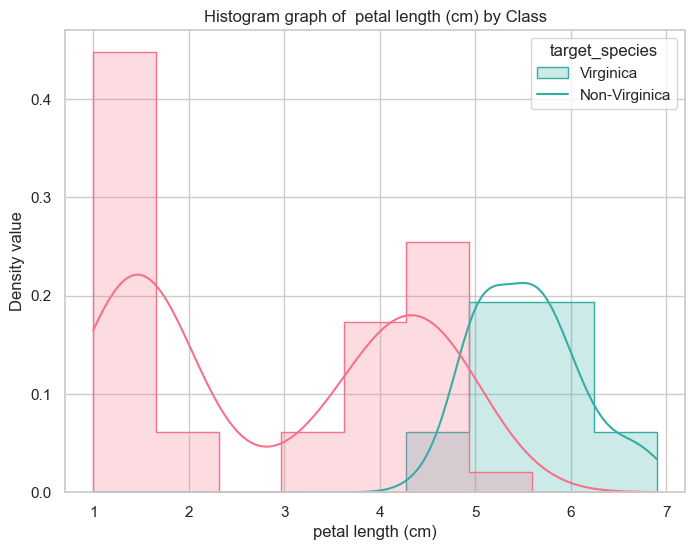

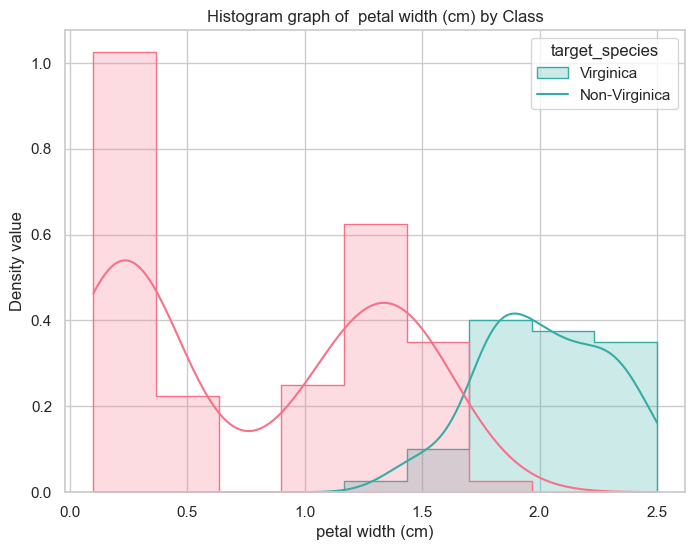

In [5]:
# Set style
sns.set(style="whitegrid")

# Define feature names
features = iris['feature_names']

# Plot histograms for each feature for virginica and non-virginica classes separately
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=iris_df_data, x=feature, hue='target_species', element="step", kde=True, palette="husl", stat="density", legend=True)
    plt.title(f'Histogram graph of  {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density value')
    plt.legend(title='target_species', labels=['Virginica', 'Non-Virginica'])
    plt.show()

### Correlation Matrix  for the four features (Sepla length, Sepal Width,Petal length, Petal Width)

correlation Matrix for the four features
                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


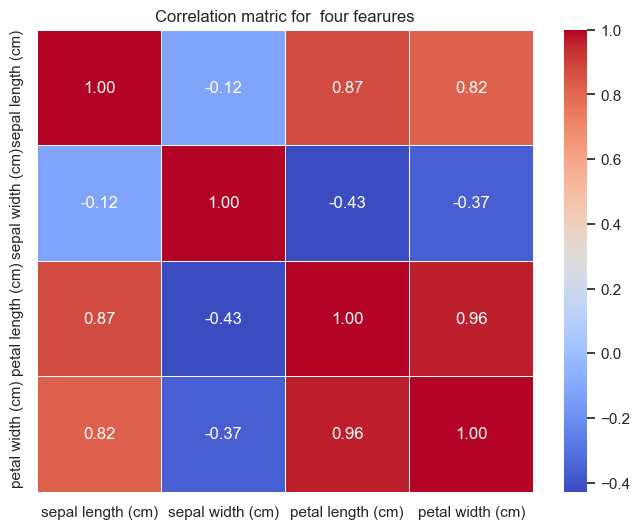

In [6]:
#correlation matrix for four features

iris_corr_matrix =  iris_df_data[features].corr()

print("correlation Matrix for the four features")
print(iris_corr_matrix)

#plot

plt.figure(figsize=(8,6))
sns.heatmap(iris_corr_matrix, annot = True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation matric for  four fearures')
plt.show()

Only three features sepal length (cm), petal length (cm), and petal width (cm) have positive correlations in the correlation maxtrix above. Only one feature sepal width (cm) has negative correlations. As a result, for the virginica spciecis flower, there is a stronger link between the petal breadth and petal length. The virginica's size after being in bigger.


### Data Visualization graph

#### Scatter plot for the sepal length vs sepal width abd petal length vs petal width

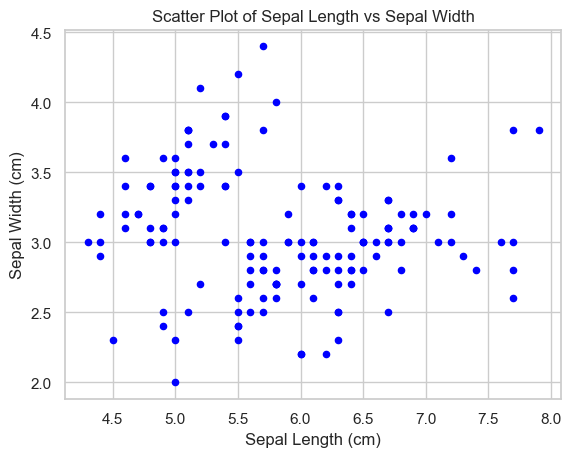

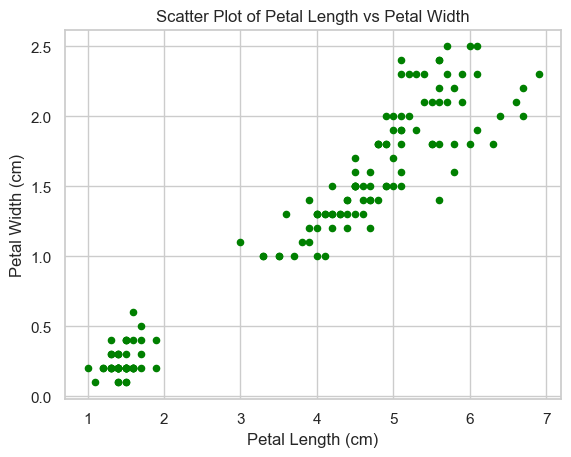

In [7]:
# Scatter plot of Sepal Length vs Sepal Width with custom color
iris_df_data.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)", color="blue")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

# Scatter plot of Petal Length vs Petal Width with custom color
iris_df_data.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)", color="green")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


### Box plot for four Features 

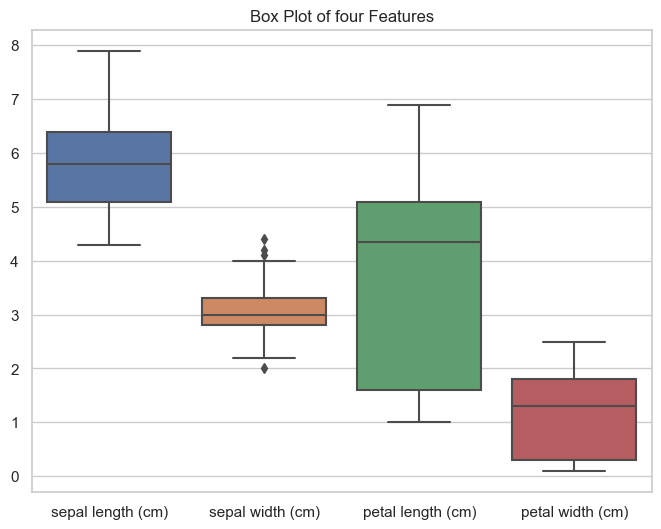

In [8]:
#insight2
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df_data.drop('target_species', axis=1))
plt.title('Box Plot of four Features')
plt.show()

### Pair plot for the four features

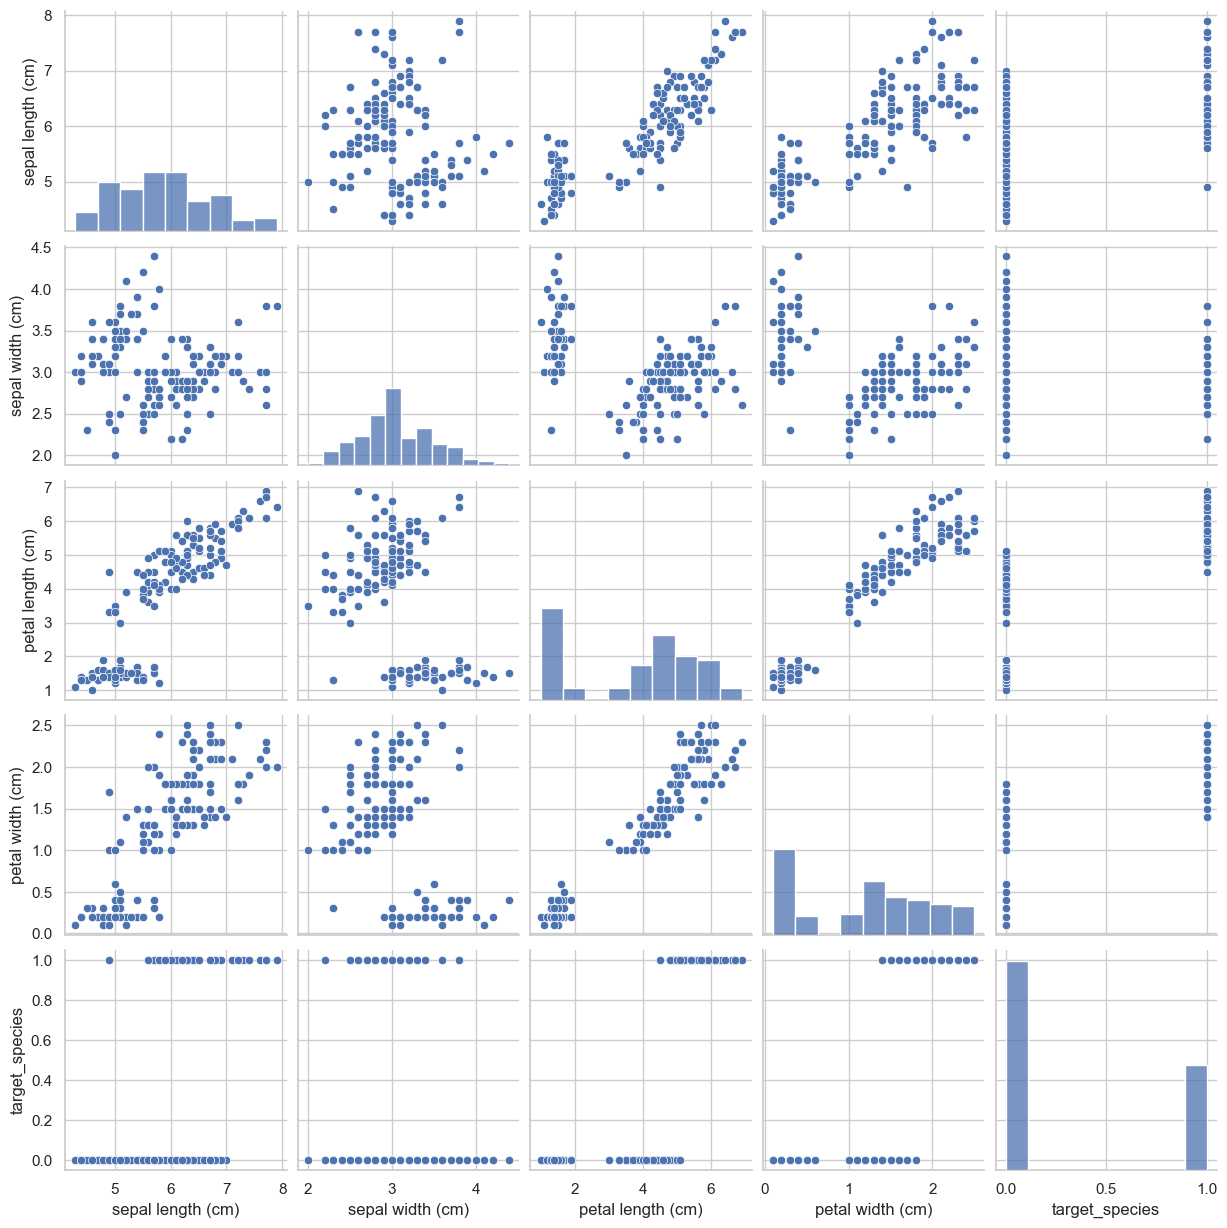

In [9]:
#insight - 3
sns.pairplot(data=iris_df_data)
plt.show()

### Split the dataset into Training set and validation set and testing set

Divide the collection into three groups. The dataset has 130 records in its shape, 120 records in the training set, and 15 records in each of the validation and testing sets for the evaluation.

In [10]:
iris_df_train_val, iris_df_test, iris_target_train_val, iris_target_test_val = train_test_split(data, bin_data, test_size=15, random_state=42)
iris_data_train, iris_data_val, iris_target_train, iris_target_val = train_test_split(iris_df_train_val,iris_target_train_val, test_size=15, random_state=42)

### Model Training for the 1,2,3 and 4 features using Logistic Regression model

In [12]:
# Logistic Regression Models
models = []
# Define sets of features for each model
features_sets = [
    [0],              # Model with 1 feature
    [0, 1],           # Model with 2 features
    [0, 1, 2],        # Model with 3 features
    [0, 1, 2, 3]      # Model with 4 features
]

for features in features_sets:
    iris_train_subset = iris_data_train[:, features]
    iris_val_subset = iris_data_val[:, features]
    model = LogisticRegression()
    model.fit(iris_train_subset, iris_target_train)
    models.append((model, features))
    

### Model Evaluation

We will evaluate the probability of virginica, predicted and ground truth for each feature (0,1,2,3) based on the validation set of 15 records, and determine the accuracy for those characteristics.

In [13]:
# Evaluation on Validation Set
iris_failure_indices = []
for model, features in models:
    iris_target_pred = model.predict(iris_data_val[:, features])
    iris_target_pred_proba = model.predict_proba(iris_data_val[:, features])[:, 1]
    validation_results = pd.DataFrame({
        'Probability of Virginica': iris_target_pred_proba,
        'Predicted': iris_target_pred,
        'Ground Truth': iris_target_val
    })
    print(f"Model with features: {features}")
    print(validation_results)
    # Here, we can summarize the validation results using a single measure like accuracy.
    accuracy = accuracy_score(iris_target_val, iris_target_pred)
    print(f"Accuracy: {accuracy}\n")
    iris_failure_indices.append([i for i, (true, pred) in enumerate(zip(iris_target_val, iris_target_pred)) if true != pred])
    


Model with features: [0]
    Probability of Virginica  Predicted  Ground Truth
0                   0.576720          1             1
1                   0.064688          0             0
2                   0.418391          0             0
3                   0.018915          0             0
4                   0.064688          0             0
5                   0.167034          0             0
6                   0.761502          1             1
7                   0.198786          0             0
8                   0.524087          1             0
9                   0.319692          0             1
10                  0.064688          0             0
11                  0.275261          0             0
12                  0.720719          1             0
13                  0.797999          1             1
14                  0.052939          0             0
Accuracy: 0.8

Model with features: [0, 1]
    Probability of Virginica  Predicted  Ground Truth
0             

### Plotting the Decision Boundary for model (Logistic regression) for 1,2 and 3 Features

In [14]:
def plot_decision_boundary(model, X, y):
    if len(model[1]) == 1:
        # Decision boundary with 1 feature
        decision_boundary = -model[0].intercept_ / model[0].coef_[0]
        trace = go.Scatter(x=decision_boundary, y=[0],
                           mode='markers',
                           line=dict(color='green', width=2),
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary for Model with 1 Feature',
                      xaxis=dict(title=iris.feature_names[model[1][0]]),
                      yaxis=dict(title='Decision Boundary'))
    elif len(model[1]) == 2:
        # Decision boundary with 2 features
        MIN_FEATURE_VALUE = X[:, model[1][0]].min()
        MAX_FEATURE_VALUE = X[:, model[1][0]].max()
        decision_boundary_x1 = np.linspace(MIN_FEATURE_VALUE, MAX_FEATURE_VALUE, 10)
        decision_boundary_x2 = -model[0].intercept_ / model[0].coef_[0][1] - \
                                model[0].coef_[0][0] / model[0].coef_[0][1] * decision_boundary_x1
        trace = go.Scatter(x=decision_boundary_x1, y=decision_boundary_x2,
                           mode='lines',
                           line=dict(color='green', width=2),
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary for Model with 2 Features',
                      xaxis=dict(title=iris.feature_names[model[1][0]]),
                      yaxis=dict(title=iris.feature_names[model[1][1]]))
    elif len(model[1]) == 3:
        # Decision boundary with 3 features
        x1, x2 = np.meshgrid(np.linspace(X[:, model[1][0]].min(), X[:, model[1][0]].max(), 10),
                             np.linspace(X[:, model[1][1]].min(), X[:, model[1][1]].max(), 10))
        decision_boundary_x3 = -model[0].intercept_ / model[0].coef_[0][2] - \
                                model[0].coef_[0][0] / model[0].coef_[0][2] * x1 - \
                                model[0].coef_[0][1] / model[0].coef_[0][2] * x2
        trace = go.Surface(x=x1, y=x2, z=decision_boundary_x3,
                           colorscale='RdBu',
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary for Model with 3 Features',
                      scene=dict(xaxis_title=iris.feature_names[model[1][0]],
                                 yaxis_title=iris.feature_names[model[1][1]],
                                 zaxis_title=iris.feature_names[model[1][2]]))
    return trace, layout
        # Decision boundary with 2 features
for i, model in enumerate(models[:3]):
    trace, layout = plot_decision_boundary(model, iris_data_val, iris_target_val)
    fig = go.Figure(data=trace, layout=layout)
    fig.show()

A single point on the plot represents the decision boundary for the model with one feature. On the other hand, the two-feature model shows a boundary that is represented by a line that separates the classes. Additionally, the three-feature model shows a border that divides the classes in an effective manner, represented by a surface plane.


#### Failure intance from the test data

There are three failure instances total for the 1- and 2-feature models, which are identical. The values in these cases fall in between the two classes' means. The accuracy of accurate probability prediction is reduced due to the limited number of data points linked to only one or two features. On the other hand, because they have a larger feature set and can estimate probability more precisely, models with three or more features perform better.


In [32]:

for i, indices in enumerate(iris_failure_indices):
    iris_failure_indices = iris_df_test[indices]
    print(f" Failure instances for {i+1} feature model:\n", iris_failure_indices)

 Failure instances for 1 feature model:
 [[6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [5.5 3.5 1.3 0.2]]
 Failure instances for 2 feature model:
 [[6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [5.5 3.5 1.3 0.2]]
 Failure instances for 3 feature model:
 []
 Failure instances for 4 feature model:
 []


### Best Fitted model recommendation:

In [15]:
from sklearn.metrics import accuracy_score

# Iterate through the models and calculate accuracies
for i, model in enumerate(models):
    best_model = model[0]
    features_indices = model[1]
    data_test_subset = iris_df_test[:, features_indices]  # Using array indexing directly
    target_test_pred = best_model.predict(data_test_subset)
    test_accuracy = accuracy_score(iris_target_test_val, target_test_pred)
    print(f"Test Accuracy of model {i+1}: {test_accuracy}")


Test Accuracy of model 1: 0.9333333333333333
Test Accuracy of model 2: 0.8666666666666667
Test Accuracy of model 3: 1.0
Test Accuracy of model 4: 1.0


Based on the model accuracy with four features, Model 3 and Model 4 have 100% accuracy with four features. Therefore, it is possible to regard either of the two models as the best option. Model 3 seems more efficient because it requires less internal computation by evaluating one fewer feature than model 4, even though model 4 may seem fail-safe because it examines all four features.
